# Hyperparameter optimisation blueprint

Join us as we explore the blueprint for hyperparameter optimization in machine learning. This talk covers tools like TensorFlow and Optuna, thorough preparatory steps including data handling and baseline modeling, and approaches from grid search to Bayesian optimization. Learn to effectively utilize algorithms such as Gaussian Processes and Tree-structured Parzen Estimators to fine-tune your models, enhancing performance and ensuring robustness. Perfect for ML professionals aiming to master their model's efficiency and accuracy.

In [2]:
!pip3 install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 86.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 90.7 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 92.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 KB 176.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 KB 214.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 KB 179.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 90.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 90.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 90.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 KB 192.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 53.9

In [1]:
import torch as pt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Dataset

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.make_classification(n_samples=50000, n_features=32, n_classes=10, n_informative=5, n_redundant=5, n_repeated=5)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape

((35000, 32), (7500, 32), (7500, 32))

## Grid search

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

model = Pipeline([
    ('preprocessor', None),
    ('model',  SGDClassifier(loss="hinge", penalty="elasticnet", fit_intercept=True, n_jobs=-1, random_state=42))
])

model.fit(X_train, y_train)
print(f"Score: {model.score(X_val, y_val): .3f}")

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

Score:  0.192
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       777
           1       0.35      0.05      0.08       768
           2       0.10      0.23      0.14       725
           3       0.21      0.37      0.27       735
           4       0.46      0.47      0.46       738
           5       0.00      0.00      0.00       744
           6       0.25      0.02      0.04       780
           7       0.23      0.02      0.04       749
           8       0.00      0.00      0.00       756
           9       0.16      0.80      0.27       728

    accuracy                           0.19      7500
   macro avg       0.18      0.20      0.13      7500
weighted avg       0.18      0.19      0.13      7500



/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Grid search

## Grid search

## Grid search

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__alpha': [1e-4, 1e-2, 1],
    'model__l1_ratio': [0, 0.1, 0.5, 1],
    'model__max_iter': [1000, 500001 ,],
    'model__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
}

grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor', None),
                                       ('model',
                                        SGDClassifier(n_jobs=-1,
                                                      penalty='elasticnet',
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.0001, 0.01, 1],
                         'model__l1_ratio': [0, 0.1, 0.5, 1],
                         'model__loss': ['hinge', 'log', 'modified_huber',
                                         'squared_hinge', 'perceptron'],
                         'model__max_iter': [1000, 5000]},
             verbose=2)

In [11]:
df = pd.DataFrame(grid_search.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,param_model__loss,param_model__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.727875,0.583665,0.007173,0.000801,0.0001,0,hinge,1000,"{'model__alpha': 0.0001, 'model__l1_ratio': 0,...",0.218394,0.231336,0.222698,0.224143,0.005382,41
1,2.902700,0.649870,0.011543,0.003527,0.0001,0,hinge,5000,"{'model__alpha': 0.0001, 'model__l1_ratio': 0,...",0.218394,0.231336,0.222698,0.224143,0.005382,41
2,0.010537,0.003385,0.000000,0.000000,0.0001,0,log,1000,"{'model__alpha': 0.0001, 'model__l1_ratio': 0,...",NaN,NaN,NaN,NaN,NaN,97
3,0.008649,0.000654,0.000000,0.000000,0.0001,0,log,5000,"{'model__alpha': 0.0001, 'model__l1_ratio': 0,...",NaN,NaN,NaN,NaN,NaN,97
4,11.217524,0.818289,0.025633,0.000908,0.0001,0,modified_huber,1000,"{'model__alpha': 0.0001, 'model__l1_ratio': 0,...",0.228422,0.262707,0.243614,0.244914,0.014027,22


In [12]:
df[['mean_test_score', 'params']]

,mean_test_score,params
0,0.224143,"{'model__alpha': 0.0001, 'model__l1_ratio': 0,..."
1,0.224143,"{'model__alpha': 0.0001, 'model__l1_ratio': 0,..."
2,NaN,"{'model__alpha': 0.0001, 'model__l1_ratio': 0,..."
3,NaN,"{'model__alpha': 0.0001, 'model__l1_ratio': 0,..."
4,0.244914,"{'model__alpha': 0.0001, 'model__l1_ratio': 0,..."
...,...,...
115,0.100257,"{'model__alpha': 1, 'model__l1_ratio': 1, 'mod..."
116,0.157828,"{'model__alpha': 1, 'model__l1_ratio': 1, 'mod..."
117,0.156999,"{'model__alpha': 1, 'model__l1_ratio': 1, 'mod..."
118,0.099400,"{'model__alpha': 1, 'model__l1_ratio': 1, 'mod..."


In [13]:
res = pd.DataFrame.from_records(df['params'].tolist())
res['score'] = df['mean_test_score']

res.head()

,model__alpha,model__l1_ratio,model__loss,model__max_iter,score
0,0.0001,0.0,hinge,1000,0.224143
1,0.0001,0.0,hinge,5000,0.224143
2,0.0001,0.0,log,1000,NaN
3,0.0001,0.0,log,5000,NaN
4,0.0001,0.0,modified_huber,1000,0.244914


## Visualizing the results

In [14]:
res.pivot_table(
    values=['score'], 
    index=['model__alpha', 'model__l1_ratio'],     # df.columns[:len(df.columns)//2]
    columns=['model__loss', 'model__max_iter']                  # df.columns[len(df.columns)//2:]         
)

score                                     \
model__loss                      hinge           modified_huber             
model__max_iter                   1000      5000           1000      5000   
model__alpha model__l1_ratio                                                
0.0001       0.0              0.224143  0.224143       0.244914  0.244914   
             0.1              0.194342  0.194342       0.243715  0.243715   
             0.5              0.187800  0.187800       0.232657  0.232657   
             1.0              0.207285  0.207285       0.236801  0.236801   
0.0100       0.0              0.235857  0.235857       0.317228  0.317228   
             0.1              0.201628  0.201628       0.314429  0.314429   
             0.5              0.217086  0.217086       0.307714  0.307714   
             1.0              0.190115  0.190115       0.312886  0.312886   
1.0000       0.0              0.197857  0.197857       0.271857  0.271857   
             0.1              0.099429  0.099429       0.268086  0.268086   
             0.5              0.099886  0.099886       0.120401  0.120401   
             1.0              0.100343  0.100343       0.100257  0.100257   

                                                                           
model__loss                  perceptron           squared_hinge            
model__max_iter                    1000      5000          1000      5000  
model__alpha model__l1_ratio                                               
0.0001       0.0               0.203515  0.203515      0.252714  0.252714  
             0.1               0.187199  0.187199      0.244800  0.244800  
             0.5               0.183113  0.183113      0.230429  0.230429  
             1.0               0.173427  0.173427      0.229744  0.229744  
0.0100       0.0               0.213228  0.213228      0.307914  0.310143  
             0.1               0.145257  0.145257      0.312429  0.315314  
             0.5               0.177285  0.177285      0.303001  0.315629  
             1.0               0.184857  0.184857      0.243171  0.276972  
1.0000       0.0               0.227886  0.227886      0.123686  0.123058  
             0.1               0.098486  0.098486      0.123743  0.125571  
             0.5               0.099657  0.099657      0.129542  0.128542  
             1.0               0.099400  0.099400      0.157828  0.156999

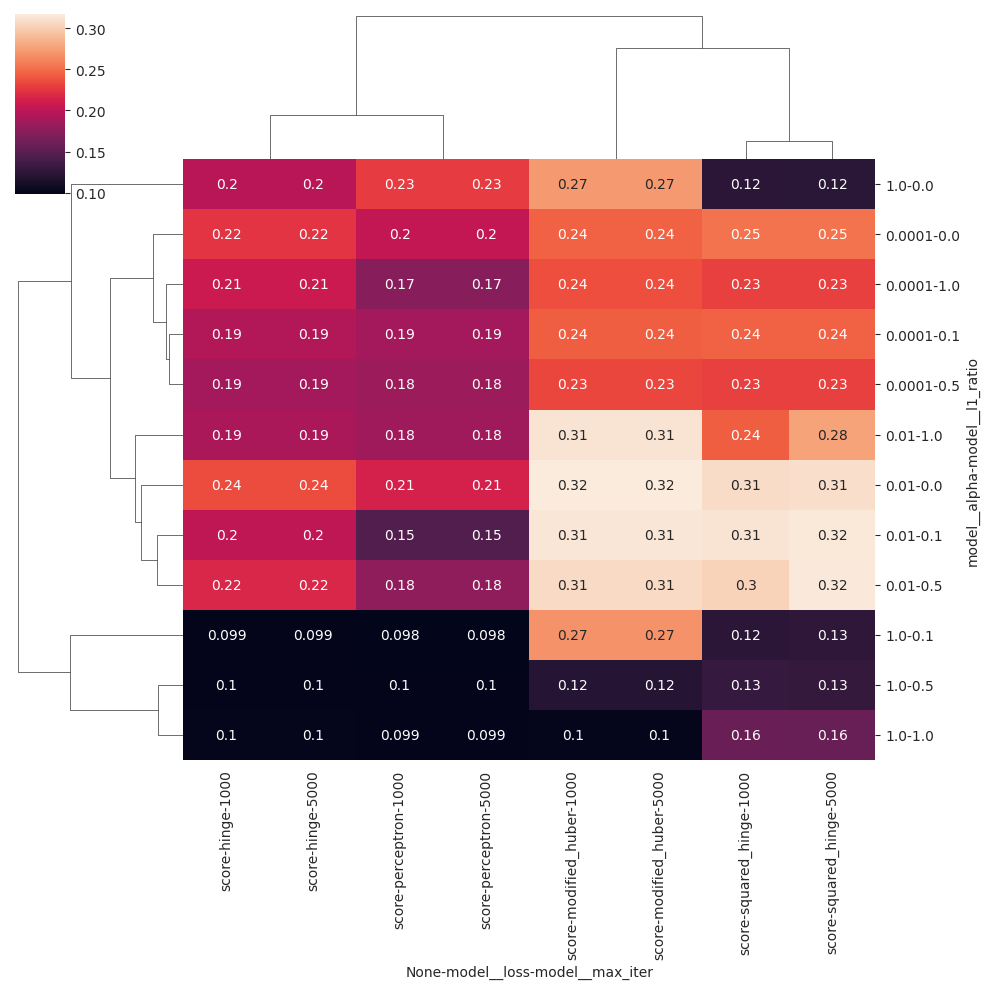

In [15]:
import seaborn as sns

sns.clustermap(res.pivot_table(
    values=['score'], 
    index=['model__alpha', 'model__l1_ratio'],     # df.columns[:len(df.columns)//2]
    columns=['model__loss', 'model__max_iter']                  # df.columns[len(df.columns)//2:]         
), annot=True)


In [16]:
grid_search.best_params_

{'model__alpha': 0.01,
 'model__l1_ratio': 0,
 'model__loss': 'modified_huber',
 'model__max_iter': 1000}

```python
from sklearn.model_selection import ParameterGrid
from tqdm.auto import tqdm

grid_search = {
        # model config
        "add_bias": [True, False],
        "dropout": [0.1, 0.8],
        "embedding_size": [8, 16],
        "lr": [0.001, 0.00001],
        
        # training procedure
        "batch_size": [50, 200],
        "shuffle": [True, False],
        "optimizer": [RMSprop, SGD]
}
        
repeats = 5
write_header()
for group, config in enumerate(tqdm(ParameterGrid(grid_search))):
    for _ in range(repeats):
        model = build_model_from_config(**config)
        history = train_from_config(model, **config)
        stats = compute_stats(history)
        write_stats(stats)
```

In [27]:
grid_search.best_score_

0.3172283466339501

## Random search

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'model__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],
    'model__l1_ratio': [0, 0.1, 0.1, 0.3, 0.5, 1],
    'model__max_iter': [1000, 5000, 10000],
    'model__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
}

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor', None),
                                             ('model',
                                              SGDClassifier(n_jobs=-1,
                                                            penalty='elasticnet',
                                                            random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__alpha': [0.0001, 0.001, 0.01,
                                                         0.1, 1],
                                        'model__l1_ratio': [0, 0.1, 0.1, 0.3,
                                                            0.5, 1],
                                        'model__loss': ['hinge', 'log',
                                                        'modified_huber',
                                                        'squared_hinge',
                                                        'perceptron'],
                                        'model__max_iter': [1000, 5000, 10000]},
                   verbose=2)

In [26]:
random_search.best_score_

0.3156287303157702

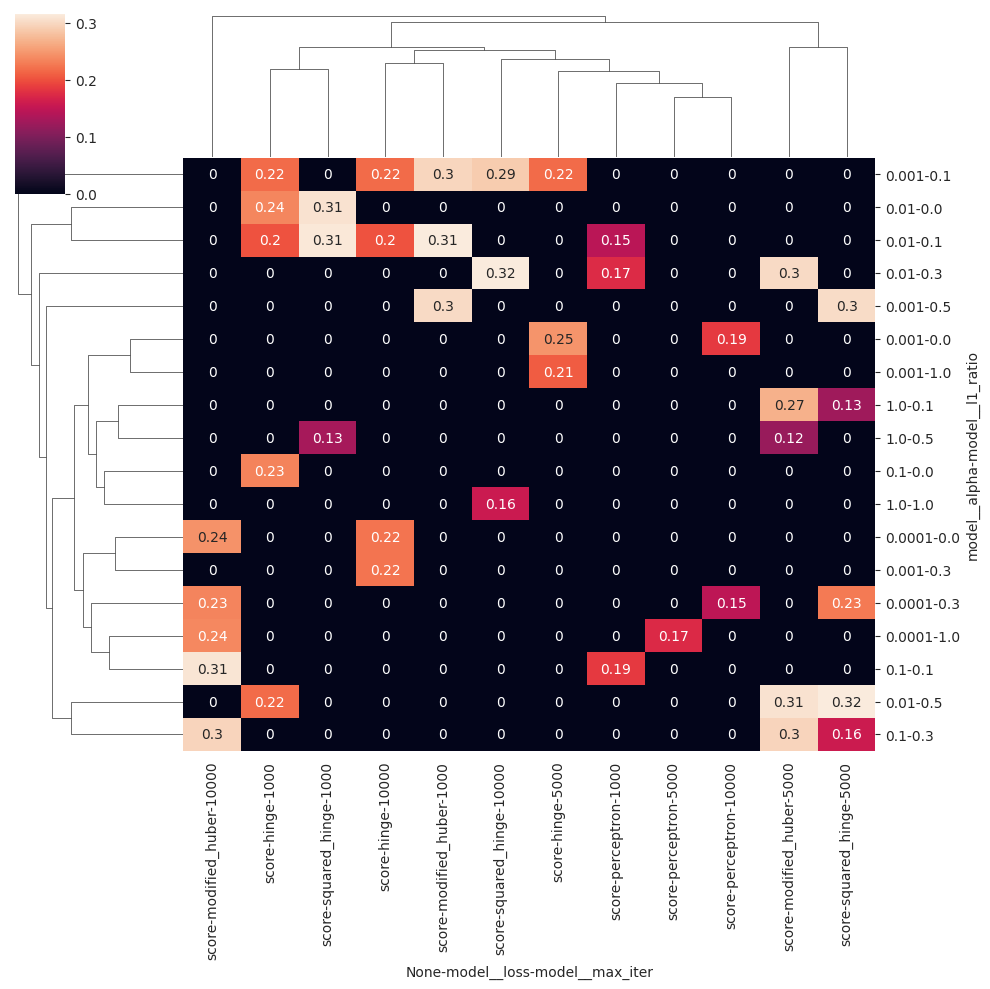

In [20]:
import seaborn as sns

df = pd.DataFrame(random_search.cv_results_)
res = pd.DataFrame.from_records(df['params'].tolist())
res['score'] = df['mean_test_score']

sns.clustermap(res.pivot_table(
    values=['score'], 
    index=['model__alpha', 'model__l1_ratio'],     # df.columns[:len(df.columns)//2]
    columns=['model__loss', 'model__max_iter']                  # df.columns[len(df.columns)//2:]         
).fillna(0), annot=True)

In [21]:
random_search.best_params_

{'model__max_iter': 5000,
 'model__loss': 'squared_hinge',
 'model__l1_ratio': 0.5,
 'model__alpha': 0.01}

## Halving grid search

In [43]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {
    'model__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],
    'model__l1_ratio': [0, 0.1, 0.1, 0.3, 0.5, 1],
    'model__max_iter': [1000, 5000, 10000],
    'model__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
}

hgs = HalvingGridSearchCV(
    estimator=model, param_grid=param_grid, factor=0.8^(-1), cv=5, n_jobs=-1, verbose=2, min_resources=1000
)
hgs.fit(X_train, y_train)

n_iterations: 9
n_required_iterations: 16
n_possible_iterations: 9
min_resources_: 1000
max_resources_: 35000
aggressive_elimination: False
factor: 1.5
----------
iter: 0
n_candidates: 450
n_resources: 1000
Fitting 5 folds for each of 450 candidates, totalling 2250 fits


/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

----------
iter: 1
n_candidates: 300
n_resources: 1500
Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=5000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=squared_hinge, model__max_iter=5000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=modified_huber, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=log, model__max_iter=5000; total time=   

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

----------
iter: 2
n_candidates: 200
n_resources: 2250
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=squared_hinge, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=perceptron, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=perceptron, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=5000; total time=   0.1s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=10000; total

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=5000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=hinge, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=modified_huber, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=10000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_ite

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=hinge, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=modified_huber, model__max_iter=5000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=modified_huber, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=hinge, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=10

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=hinge, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=10000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=1000; total time=   0.1s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=10000; t

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=squared_hinge, model__max_iter=10000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=1000; total time=   0.6s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=5000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=log, model__max_iter=10000; tota

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

----------
iter: 3
n_candidates: 134
n_resources: 3375
Fitting 5 folds for each of 134 candidates, totalling 670 fits
[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=perceptron, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=modified_huber, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=5000; tota

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=hinge, model__max_iter=1000; total time=   0.1s
[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=modified_huber, model__max_iter=10000; total time=   0.1s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=1000; total time=   0.5s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=1000; total time=   0.6s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=squared_hinge, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=perceptron, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=modified_huber, model__max_iter=1000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=10000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=5000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=squared_hinge, model__max_iter=10

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=perceptron, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=perceptron, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=perceptron, model__max_iter=5000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.5, model__loss=hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=1, model__loss=squared_hinge, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.01, model__l1_ratio=0, model__loss=perceptron, model

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=squared_hinge, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=perceptron, model__max_iter=5000; total time=   0.6s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=10000; total time=   0.1s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=1000; total time=   0.6s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=hinge, model__max_iter=10000; t

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=perceptron, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=hinge, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=perceptron, model__max_iter=5000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=5000; total time=   0.1s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=5000; 

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=log, model__max_iter=10000; to

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

----------
iter: 4
n_candidates: 90
n_resources: 5062
Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=hinge, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=hinge, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=hinge, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=10000

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=10000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=perceptron, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=hinge, model__max_iter=10000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=perceptron, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=perceptron, mod

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=perceptron, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=hinge, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=modified_huber, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=1000; total time=   0.1s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=log, model__max_iter=5000; tota

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=hinge, model__max_iter=10000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=1000; total time=   0.5s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=squared_hinge, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=perceptron, model__max

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

----------
iter: 5
n_candidates: 60
n_resources: 7593
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=modified_huber, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=5000; total time=   0.6s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=modified_huber, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=perceptron, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=hinge, m

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=log, model__max_iter=1000; total time=   0.0s


/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=modified_huber, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=perceptron, model__max_iter=10000; total time=   0.5s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=modified_huber, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.5, model__loss=modified_huber, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.001, model__l1_ratio=1, model__loss=squared_hinge, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.01, model__l1_ratio=0.1, mode

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=modified_huber, model__max_iter=5000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=hinge, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=modified_huber, model__max_iter=10000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=5000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=modified_huber, model__max_i

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=squared_hinge, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=hinge, model__max_iter=10000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=1000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.5, model__loss=hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.001, model__l1_ratio=1, model__loss=hinge, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.01, model__l1_ratio=0, model__loss=modified_huber, model__max_iter=5000; t

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=squared_hinge, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=squared_hinge, model__max_iter=10000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=10000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=perceptron, model__max_iter=1000; total time=   0.1s
[CV] END model__alpha=0.001, model__l1_ratio=0.5, model__loss=modified_huber, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=1, model__loss=perceptro

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=squared_hinge, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=perceptron, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.001, model__l1_ratio=0.5, model__loss=hinge, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.001, model__l1_ratio=1, model__loss=modified_huber, model__

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.203      0.203      0.203      ... 0.30052701 0.30052701 0.30052701]
  warnings.warn(
/space/envs/sentiocx/lib/python3.1

----------
iter: 6
n_candidates: 40
n_resources: 11390
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=modified_huber, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=log, model__max_iter=1000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=modified_huber, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=perceptron, model__max_iter=1000; total t

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=10000; total time=   0.5s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=log, model__max_iter=5000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=modified_huber, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=squared_hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=10000; total time=   0.1s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.5, model__loss=squared_hinge, model__max_iter=10000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=1, model__loss=squared_hinge, m

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=perceptron, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=perceptron, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=10000; total time=   0.1s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=5000; total time=   0.1s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=hinge, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.5, model__loss=squared_hinge, model_

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.203      0.203      0.203      ... 0.30790167 0.30790167 0.30790167]
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the train scores are non-finite: [0.24525    0.24525    0.24525    ... 0.31637401 0.31637401 0.31637401]
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__loss=modified_huber, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=hinge, model__max_iter=5000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=modified_huber, model__max_iter=1000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=squared_hinge, model__max_iter=1000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.5, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.5, model__loss=modified_huber, model__max_iter=

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=perceptron, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=modified_huber, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=modified_huber, model__max_iter=10000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=10000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=1000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.5, model__loss=hinge, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=1, model__loss=hinge, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.01, model__l1_ratio=0, model__loss=modified_huber, model__max_iter=5000; total time=   0.5s
[CV] END model__alpha=0.01, model__l1_ratio=0.1, model__loss=squared_hinge, model__m

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/space/envs/sentiocx/lib/python3

----------
iter: 8
n_candidates: 18
n_resources: 25628
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END model__alpha=0.0001, model__l1_ratio=0, model__loss=modified_huber, model__max_iter=10000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=log, model__max_iter=10000; total time=   0.0s
[CV] END model__alpha=0.0001, model__l1_ratio=0.3, model__loss=squared_hinge, model__max_iter=1000; total time=   0.3s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__loss=perceptron, model__max_iter=1000; total time=   0.2s
[CV] END model__alpha=0.0001, model__l1_ratio=1, model__loss=squared_hinge, model__max_iter=5000; total time=   0.2s
[CV] END model__alpha=0.001, model__l1_ratio=0, model__loss=squared_hinge, model__max_iter=1000; total time=   0.5s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__loss=hinge, model__max_iter=5000; total time=   0.4s
[CV] END model__alpha=0.001, model__l1_ratio=0.3, model__loss=perceptron, mod

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.203      0.203      0.203      ... 0.30552195 0.30552195 0.30552195]
  warnings.warn(
/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the train scores are non-finite: [0.24525   0.24525   0.24525   ... 0.3078724 0.3078724 0.3078724]
  warnings.warn(


HalvingGridSearchCV(estimator=Pipeline(steps=[('preprocessor', None),
                                              ('model',
                                               SGDClassifier(n_jobs=-1,
                                                             penalty='elasticnet',
                                                             random_state=42))]),
                    factor=1.5, min_resources=1000, n_jobs=-1,
                    param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                                'model__l1_ratio': [0, 0.1, 0.1, 0.3, 0.5, 1],
                                'model__loss': ['hinge', 'log',
                                                'modified_huber',
                                                'squared_hinge', 'perceptron'],
                                'model__max_iter': [1000, 5000, 10000]},
                    verbose=2)

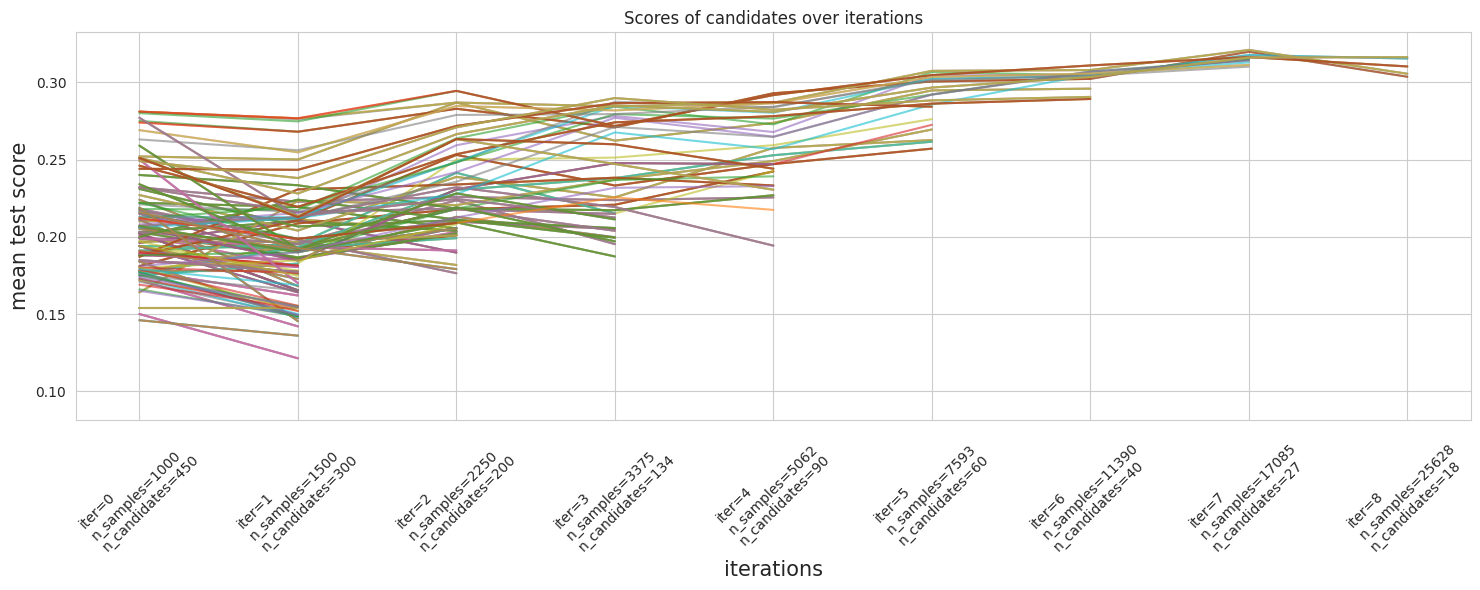

In [44]:
results = pd.DataFrame(hgs.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6, figsize=(15, 6))

labels = [
    f"iter={i}\nn_samples={hgs.n_resources_[i]}\nn_candidates={hgs.n_candidates_[i]}"
    for i in range(hgs.n_iterations_)
]

ax.set_xticks(range(hgs.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()
plt.show()

In [46]:
hgs.best_params_

{'model__alpha': 0.1,
 'model__l1_ratio': 0.1,
 'model__loss': 'modified_huber',
 'model__max_iter': 1000}

In [45]:
hgs.best_score_

0.3162536585365854

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

model = RandomForestClassifier(n_estimators=20)

param_grid = {
    "max_depth": [3, None],
    "max_features": np.random.randint(1, 6, 3),
    "min_samples_split": np.random.randint(2, 11, 3),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
}
rf_hgs = HalvingGridSearchCV(
    estimator=model, param_grid=param_grid, factor=0.8**(-1), cv=5, n_jobs=-1, verbose=2, min_resources=1000
)
rf_hgs.fit(X_train, y_train)
print(rf_hgs.best_params_)
print(rf_hgs.best_score_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_split': 4}
0.7238916256157635


## Multiple models

In [47]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/hyperopt/hyperopt-sklearn to /tmp/pip-req-build-taclu2d8
  Running command git clone --filter=blob:none --quiet https://github.com/hyperopt/hyperopt-sklearn /tmp/pip-req-build-taclu2d8
  Resolved https://github.com/hyperopt/hyperopt-sklearn to commit 4bc286479677a0bfd2178dac4546ea268b3f3b77
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 KB 230.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 KB 187.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 175.8 MB/s eta 0:00:00
  Created wheel for hpsklearn: filename=hpsklearn-1.0.3-py3-none-any.whl size=135342 sha256=4e5345e6e33cc04758f425adea802f76d53564efda2d35782

In [ ]:
from hpsklearn import HyperoptEstimator
from hyperopt import tpe
from hyperopt import hp

estim = HyperoptEstimator(
    classifier=hp.choice('classifier_type', [
        {
            'type': 'naive_bayes',
        },
        {
            'type': 'svm',
            'C': hp.lognormal('svm_C', 0, 1),
            'kernel': hp.choice('svm_kernel', [
                {'ktype': 'linear'},
                {'ktype': 'RBF', 'width': hp.lognormal('svm_rbf_width', 0, 1)},
            ]),
        },
        {
            'type': 'dtree',
            'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
            'max_depth': hp.choice('dtree_max_depth',
                                   [None, hp.qlognormal('dtree_max_depth_int', 3, 1, 1)]),
            'min_samples_split': hp.qlognormal('dtree_min_samples_split', 2, 1, 1),
        },
    ]),
    algo=tpe.suggest,
    max_evals=100,
    trial_timeout=120,
    n_jobs=-1,
    verbose=2
)

# Search the hyperparameter space based on the data
estim.fit(X_train, y_train)

# Show the results
print(estim.score(X_test, y_test))
# 1.0

print(estim.best_model())

In [4]:
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing, all_classifiers
from hyperopt import tpe
import numpy as np
from hyperopt import hp

from hpsklearn import random_forest_classifier, \
    extra_tree_classifier, \
    ada_boost_classifier, \
    sgd_classifier, \
    k_neighbors_classifier, \
    svc
    
name = 'my_clf'

# Instantiate a HyperoptEstimator with the search space and number of evaluations
estim = HyperoptEstimator(
        classifier=hp.choice(name, [
            svc(name + ".svc"),
            k_neighbors_classifier(name + ".knn"),
            random_forest_classifier(name + ".random_forest"),
            extra_tree_classifier(name + ".extra_trees"),
            ada_boost_classifier(name + ".ada_boost"),
            sgd_classifier(name + ".sgd")
        ]),
        preprocessing=any_preprocessing("my_pre"),
        algo=tpe.suggest,
        max_evals=100,
        trial_timeout=60, 
        n_jobs=-1,
        verbose=2
)

# Search the hyperparameter space based on the data
estim.fit(X_train, y_train)

# Show the results
print(estim.score(X_test, y_test))
# 1.0

print(estim.best_model())

Will use the last 0.2 portion of samples for validation
Fitting PCA(n_components=60) to X of shape (28000, 32)
Limited PCA n_components at 32                       
Transforming Xfit (28000, 32)                        
Transforming Xval (7000, 32)                         
Training learner ExtraTreeClassifier(criterion='entropy', max_features=0.1475703439756273,
                    max_leaf_nodes=10, random_state=1) on X/EX of dimension (28000, 32)
Scoring on X/EX validation of shape (7000, 32)       
OK trial with accuracy 9.7 +- 0.4                    
100%|██████████| 1/1 [00:00<00:00,  3.36trial/s, best loss: 0.9025714285714286]
Will use the last 0.2 portion of samples for validation
Fitting StandardScaler(with_mean=False, with_std=False) to X of shape (28000, 32)
Transforming Xfit (28000, 32)                        
Transforming Xval (7000, 32)                         
Training learner SVC(C=0.770609665789906, coef0=0.06916037692393207,
    decision_function_shape='ovo', degree=1, 

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Scoring on X/EX validation of shape (7000, 32)         
OK trial with accuracy 35.7 +- 0.6                     
100%|██████████| 13/13 [00:16<00:00, 16.07s/trial, best loss: 0.3341428571428572]
Will use the last 0.2 portion of samples for validation
Fitting MinMaxScaler(clip=True, feature_range=(-1.0, 1.0)) to X of shape (28000, 32)
Transforming Xfit (28000, 32)                          
Transforming Xval (7000, 32)                           
Training learner SVC(C=1.217473545642486, coef0=0.6775637996894184, degree=4, kernel='linear',
    random_state=1, shrinking=False, tol=2.369319234228764e-05) on X/EX of dimension (28000, 32)
TERMINATING DUE TO TIME-OUT.                           
100%|██████████| 14/14 [01:00<00:00, 60.11s/trial, best loss: 0.3341428571428572]
Will use the last 0.2 portion of samples for validation
Fitting Normalizer(norm='max') to X of shape (28000, 32)
Transforming Xfit (28000, 32)                          
Transforming Xval (7000, 32)                          

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Scoring on X/EX validation of shape (7000, 32)         
OK trial with accuracy 17.6 +- 0.5                     
100%|██████████| 16/16 [00:03<00:00,  3.49s/trial, best loss: 0.3341428571428572]
Will use the last 0.2 portion of samples for validation
Fitting StandardScaler(with_mean=False) to X of shape (28000, 32)
Transforming Xfit (28000, 32)                          
Transforming Xval (7000, 32)                           
Training learner SVC(C=0.6369482694083042, coef0=0.46110449355030303,
    decision_function_shape='ovo', degree=1, kernel='poly', random_state=2,
    tol=1.5074745896550188e-05) on X/EX of dimension (28000, 32)
Scoring on X/EX validation of shape (7000, 32)         
OK trial with accuracy 39.2 +- 0.6                     
100%|██████████| 17/17 [00:43<00:00, 43.27s/trial, best loss: 0.3341428571428572]
Will use the last 0.2 portion of samples for validation
Fitting MinMaxScaler(feature_range=(-1.0, 1.0)) to X of shape (28000, 32)
Transforming Xfit (28000, 32)        

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



TERMINATING DUE TO TIME-OUT.                           
100%|██████████| 50/50 [01:00<00:00, 60.14s/trial, best loss: 0.3064285714285714]
Will use the last 0.2 portion of samples for validation
Fitting StandardScaler(with_mean=False, with_std=False) to X of shape (28000, 32)
Transforming Xfit (28000, 32)                          
Transforming Xval (7000, 32)                           
Training learner KNeighborsClassifier(algorithm='brute', leaf_size=36, metric='euclidean',
                     n_jobs=-1, n_neighbors=9, p=2.4590441394222617,
                     weights='distance') on X/EX of dimension (28000, 32)
Scoring on X/EX validation of shape (7000, 32)         
OK trial with accuracy 62.2 +- 0.6                     
100%|██████████| 51/51 [00:00<00:00,  2.22trial/s, best loss: 0.3064285714285714]
Will use the last 0.2 portion of samples for validation
Fitting MinMaxScaler(feature_range=(-1.0, 1.0)) to X of shape (28000, 32)
Transforming Xfit (28000, 32)                         

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Scoring on X/EX validation of shape (7000, 32)         
OK trial with accuracy 17.6 +- 0.5                     
100%|██████████| 71/71 [00:05<00:00,  5.74s/trial, best loss: 0.2681428571428571]
Will use the last 0.2 portion of samples for validation
Fitting StandardScaler() to X of shape (28000, 32)     
Transforming Xfit (28000, 32)                          
Transforming Xval (7000, 32)                           
Training learner RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       min_samples_leaf=6, n_estimators=62, n_jobs=-1,
                       random_state=0, verbose=False) on X/EX of dimension (28000, 32)
Scoring on X/EX validation of shape (7000, 32)         
OK trial with accuracy 72.0 +- 0.5                     
100%|██████████| 72/72 [00:00<00:00,  1.21trial/s, best loss: 0.2681428571428571]
Will use the last 0.2 portion of samples for validation
Fitting StandardScaler() to X of shape (28000, 32)     
Transforming Xfit (28000, 

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Scoring on X/EX validation of shape (7000, 32)         
OK trial with accuracy 17.6 +- 0.5                     
100%|██████████| 93/93 [00:01<00:00,  1.70s/trial, best loss: 0.263]
Will use the last 0.2 portion of samples for validation
Fitting StandardScaler() to X of shape (28000, 32)     
Transforming Xfit (28000, 32)                          
Transforming Xval (7000, 32)                           
Training learner RandomForestClassifier(bootstrap=False, max_features='log2', n_estimators=112,
                       n_jobs=-1, random_state=3, verbose=False) on X/EX of dimension (28000, 32)
Scoring on X/EX validation of shape (7000, 32)         
OK trial with accuracy 73.6 +- 0.5                     
100%|██████████| 94/94 [00:01<00:00,  1.56s/trial, best loss: 0.263]
Will use the last 0.2 portion of samples for validation
Fitting StandardScaler(with_std=False) to X of shape (28000, 32)
Transforming Xfit (28000, 32)                          
Transforming Xval (7000, 32)               

In [8]:
from sklearn.metrics import classification_report

# Show the results
print(estim.score(X_test, y_test))
# 1.0

print(estim.best_model())

y_pred = estim.predict(X_val)
print(classification_report(y_val, y_pred))

Fitting StandardScaler() to X of shape (7500, 32)
Transforming Xfit (7500, 32)
0.7508
{'learner': RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       n_estimators=111, n_jobs=-1, random_state=3,
                       verbose=False), 'preprocs': (StandardScaler(),), 'ex_preprocs': ()}
Fitting StandardScaler() to X of shape (7500, 32)
Transforming Xfit (7500, 32)
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       780
           1       0.74      0.77      0.75       782
           2       0.73      0.68      0.70       764
           3       0.73      0.76      0.74       736
           4       0.74      0.65      0.69       729
           5       0.82      0.82      0.82       755
           6       0.75      0.81      0.78       768
           7       0.75      0.72      0.73       732
           8       0.81      0.82      0.82       713
           9       0.75      0.72      0.73     

In [44]:
rsh.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 3,
 'min_samples_split': 6}

In [55]:
rsh.best_score_

0.8545454545454545

## FLAML

In [12]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 KB 2.9 MB/s eta 0:00:00a 0:00:01


[FLAML](https://microsoft.github.io/FLAML/docs/getting-started)

Automatically searches all possible hiperparameters and models.
* It uses custom objects (flaml internal)
* It defines built-in search spaces for each type of model
* Runs on a predefined time budget

https://www.microsoft.com/en-us/research/uploads/prod/2021/03/MLSys21FLAML.pdf



In [13]:
from flaml import AutoML
from flaml.automl.model import RandomForestEstimator, XGBoostEstimator, LightGBMEstimator, CatBoostEstimator

automl = AutoML()
automl.add_learner('rf', RandomForestEstimator)
automl.add_learner('xgboost', XGBoostEstimator)

settings = {
    "time_budget": 180,  # total running time in seconds
    # "metric": custom_metric,
    "metric": 'accuracy',
    "estimator_list": ['rf'],
    "task": 'classification',  # task type
    "log_file_name": 'flaml_experiment.log',  # flaml log file
    "X_val": X_val,
    "y_val": y_val,
    "verbose": 10,
}

automl.fit(X_train=X_train, y_train=y_train, **settings)

print('Best hyper-parmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1 - automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

[flaml.automl.logger: 06-10 14:07:01] {1680} INFO - task = classification
[flaml.automl.logger: 06-10 14:07:01] {1688} INFO - Data split method: stratified
[flaml.automl.logger: 06-10 14:07:01] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 06-10 14:07:01] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 06-10 14:07:01] {1901} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl.logger: 06-10 14:07:01] {2219} INFO - iteration 0, current learner rf
[flaml.tune.tune: 06-10 14:07:01] {811} INFO - trial 1 config: {'n_estimators': 4, 'max_features': 0.17677669529663687, 'max_leaves': 4, 'criterion': 'entropy'}
[flaml.tune.tune: 06-10 14:07:02] {202} INFO - result: {'pred_time': 2.1066665649414063e-06, 'wall_clock_time': 0.3543701171875, 'metric_for_logging': {'pred_time': 2.1066665649414063e-06}, 'val_loss': 0.7163999999999999, 'trained_estimator': <flaml.automl.model.RandomForestEstimator object at 0x7f42417541c0>, 'training_iteration': 0, '

In [18]:
from flaml import AutoML
from flaml.automl.model import RandomForestEstimator, XGBoostEstimator

automl = AutoML()
# automl.add_learner('rf', RandomForestEstimator)
# automl.add_learner('xgboost', XGBoostEstimator)

settings = {
    "time_budget": 180,  # total running time in seconds
    # "metric": custom_metric,
    "metric": 'accuracy',
    "estimator_list": ['rf', 'xgboost', 'extra_tree', 'lrl1'],
    "task": 'classification',  # task type
    "log_file_name": 'flaml_experiment.log',  # flaml log file
    "X_val": X_val,
    "y_val": y_val,
    "verbose": 10,
}

automl.fit(X_train=X_train, y_train=y_train, **settings)

print('Best hyper-parmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1 - automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

[flaml.automl.logger: 06-10 14:13:51] {1680} INFO - task = classification
[flaml.automl.logger: 06-10 14:13:51] {1688} INFO - Data split method: stratified
[flaml.automl.logger: 06-10 14:13:51] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 06-10 14:13:51] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 06-10 14:13:51] {1901} INFO - List of ML learners in AutoML Run: ['rf', 'xgboost', 'extra_tree', 'lrl1']
[flaml.automl.logger: 06-10 14:13:51] {2219} INFO - iteration 0, current learner rf
[flaml.tune.tune: 06-10 14:13:51] {811} INFO - trial 1 config: {'n_estimators': 4, 'max_features': 0.17677669529663687, 'max_leaves': 4, 'criterion': 'entropy'}
[flaml.tune.tune: 06-10 14:13:52] {202} INFO - result: {'pred_time': 2.068964640299479e-06, 'wall_clock_time': 0.36884593963623047, 'metric_for_logging': {'pred_time': 2.068964640299479e-06}, 'val_loss': 0.7163999999999999, 'trained_estimator': <flaml.automl.model.RandomForestEstimator object at 0x7f4240

/space/envs/sentiocx/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [19]:
automl.model.estimator.get_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': None,
 'callbacks': [],
 'colsample_bylevel': 0.22820469798161158,
 'colsample_bynode': None,
 'colsample_bytree': 0.47685226226628724,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': 'lossguide',
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.05717352842648702,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 0,
 'max_leaves': 340,
 'min_child_weight': 0.3369642038062319,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 1238,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 0.012994716246045418,
 'reg_lambda': 1.6414568993208103,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8413048297641477,
 'tree_method': 'hist',
 'validat

You can transplant the best model to a scikit-learn model

For custom estimators you need to define a custom search space

```python
from flaml.automl.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import rgf


class MyRegularizedGreedyForest(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from rgf.sklearn import RGFClassifier
            self.estimator_class = RGFClassifier
        else:
            from rgf.sklearn import RGFRegressor
            self.estimator_class = RGFRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
        "max_leaf": {
            "domain": tune.lograndint(lower=4, upper=data_size),
            "low_cost_init_value": 4,
        },
        "n_iter": {
            "domain": tune.lograndint(lower=1, upper=data_size),
            "low_cost_init_value": 1,
        },
        "learning_rate": {"domain": tune.loguniform(lower=0.01, upper=20.0)},
        "min_samples_leaf": {
            "domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,
        },
        }
        return space
```

## Bayesian optimization

Bayesian Optimization builds a probability model of the objective function and uses it to select hyperparameter to evaluate in the true objective function.
Uses Gaussian Processes and Tree-structured Parzen Estimators for finding the next best hyperparameter.
> Prezen-Trees are a type of decision tree that uses a kernel density estimator to estimate the probability density function of the target variable.

Probably better explained [here](https://towardsdatascience.com/bayesian-optimization-concept-explained-in-layman-terms-1d2bcdeaf12f)  


In [20]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 KB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 KB 9.1 MB/s eta 0:00:00a 0:00:01


In [24]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)

param_grid = {
    'bootstrap': Categorical([True, False]),
    'max_depth': Integer(10, 100),
    'max_features': Integer(1, 10),
    'min_samples_leaf': Integer(1, 10),
    'min_samples_split': Integer(2, 10),
    'n_estimators': Integer(10, 100),
    'max_leaf_nodes': Integer(10, 100),
    'min_impurity_decrease': Real(0.0, 0.1),
    'criterion': Categorical(['gini', 'entropy']),
    'min_weight_fraction_leaf': Real(0.0, 0.5),
}
    
bayes_search = BayesSearchCV(model, param_grid, n_iter=100, cv=3, n_jobs=-1, verbose=2)
bayes_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/space/envs/sentiocx/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=87, max_features=5, max_leaf_nodes=87, min_impurity_decrease=0.0449359882648185, min_samples_leaf=1, min_samples_split=6, min_weight_fraction_leaf=0.13075334302914463, n_estimators=99; total time=   5.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=10, max_leaf_nodes=100, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=100; total time=  15.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, 

/space/envs/sentiocx/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'gini', 100, 5, 100, 0.0, 10, 2, 0.0, 100] before, using random point [True, 'gini', 79, 3, 86, 0.05096468322047318, 5, 4, 0.1176891672506021, 29]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/space/envs/sentiocx/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'gini', 100, 5, 100, 0.0, 10, 2, 0.0, 100] before, using random point [True, 'gini', 13, 6, 17, 0.04062779393700803, 1, 2, 0.020432155263404642, 13]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=20),
              n_iter=100, n_jobs=-1,
              search_spaces={'bootstrap': Categorical(categories=(True, False), prior=None),
                             'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'max_features': Integer(low=1, high=10, prior='...
                             'min_impurity_decrease': Real(low=0.0, high=0.1, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'min_weight_fraction_leaf': Real(low=0.0, high=0.5, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=100, prior='uniform', transform='normalize')},
              verbose=2)

In [22]:
bayes_search.best_params_

OrderedDict([('bootstrap', True),
             ('criterion', 'entropy'),
             ('max_depth', 53),
             ('max_features', 5),
             ('max_leaf_nodes', 28),
             ('min_impurity_decrease', 0.03637934981190102),
             ('min_samples_leaf', 9),
             ('min_samples_split', 5),
             ('min_weight_fraction_leaf', 0.3054780023927766),
             ('n_estimators', 57)])

In [25]:
bayes_search.best_score_
# 0.76435

0.76435

<Axes: >

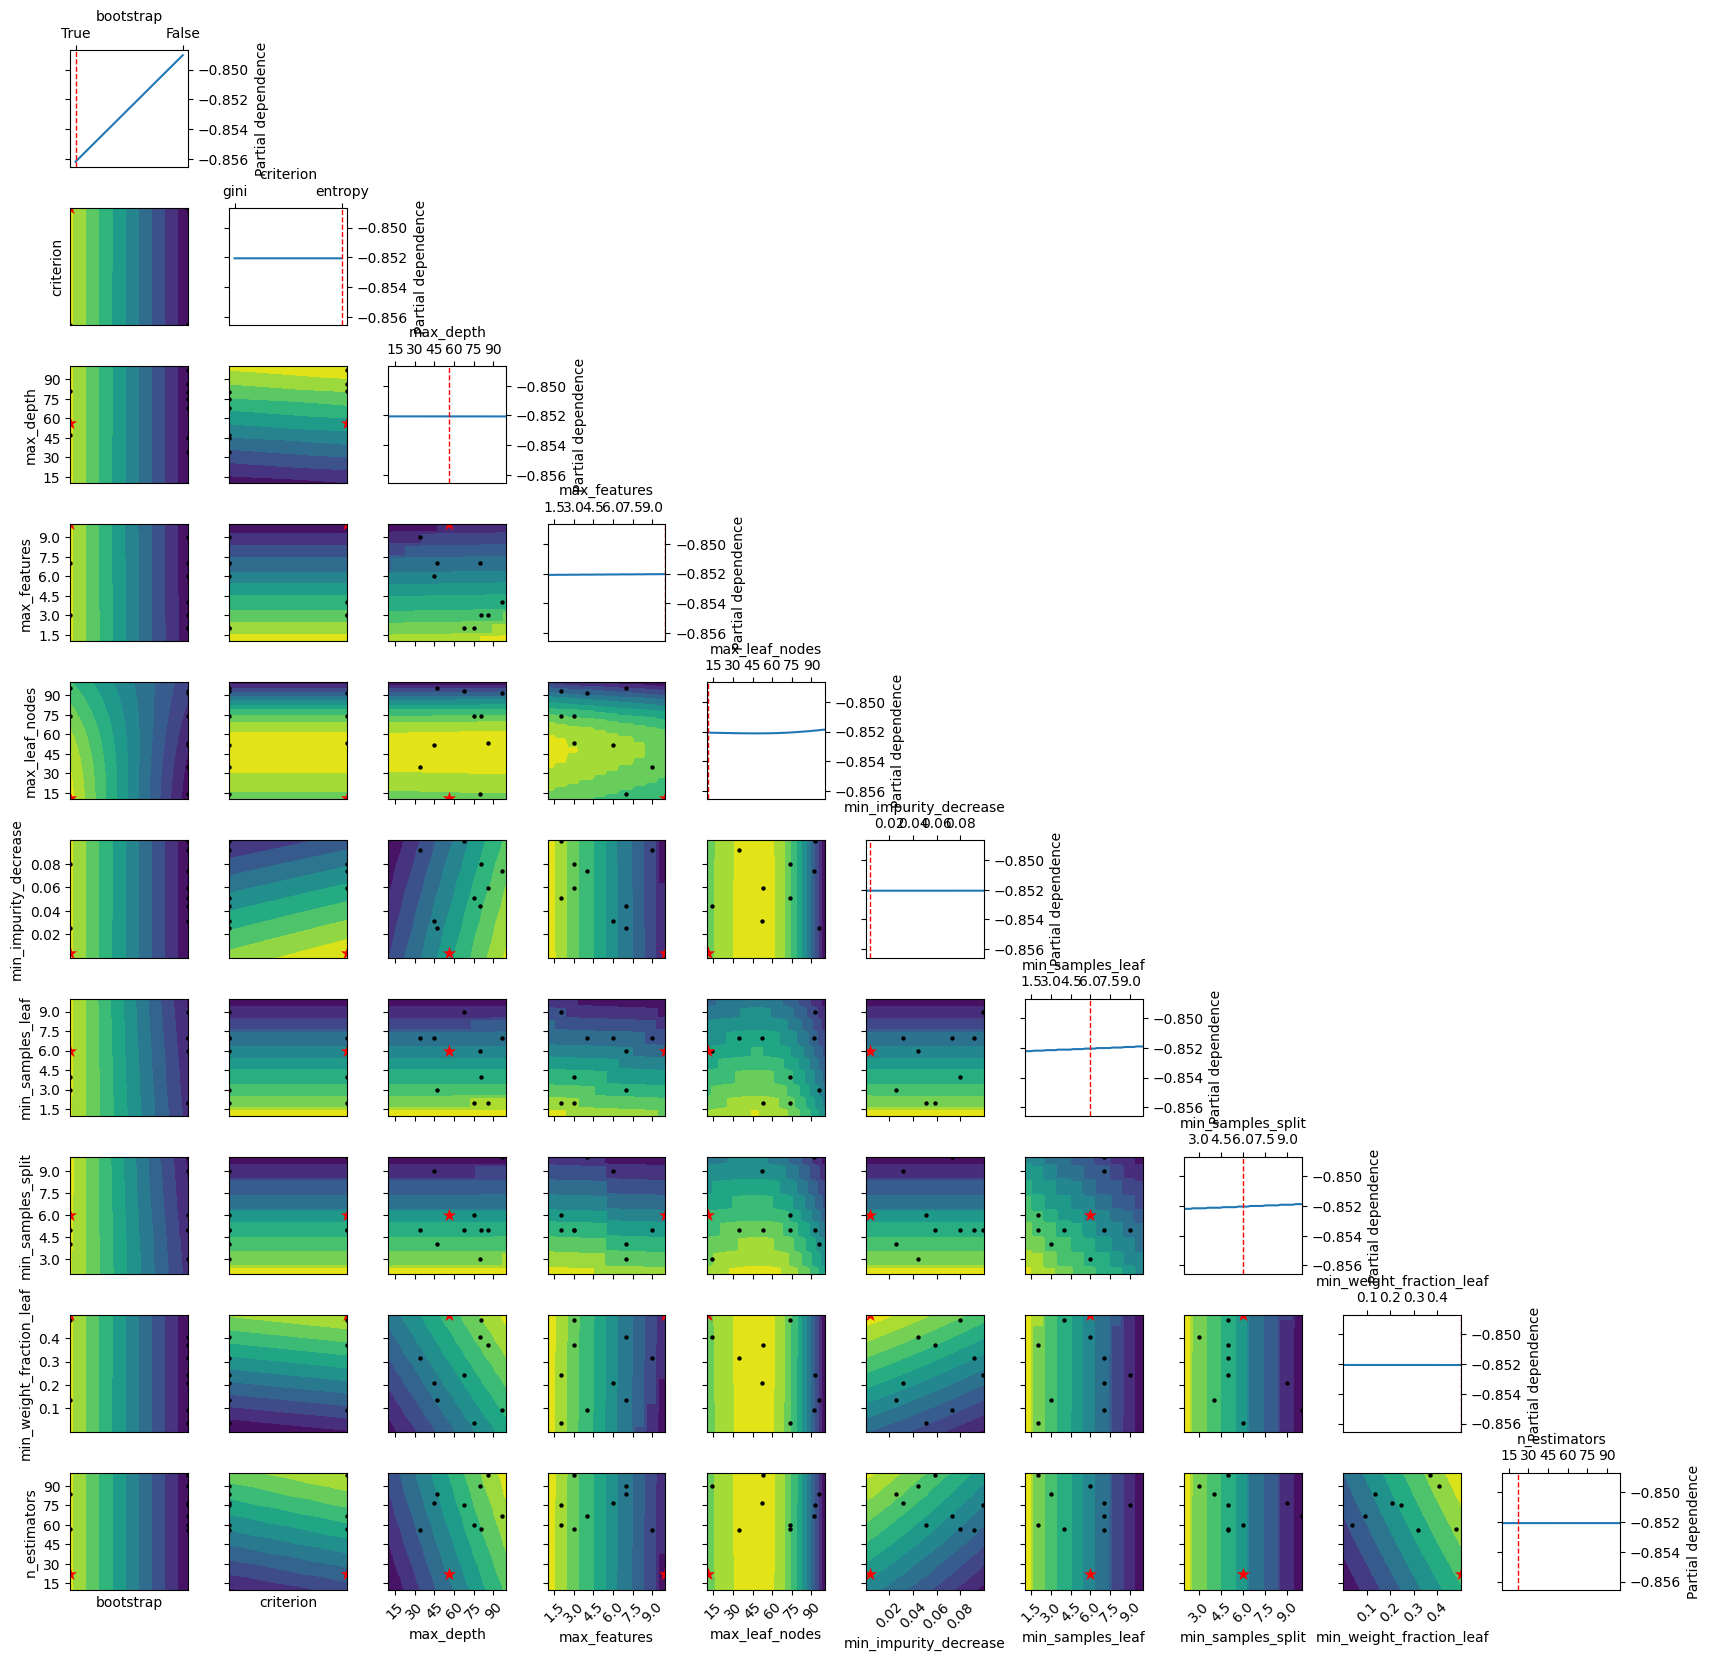

In [63]:
from skopt.plots import plot_objective
plot_objective(bayes_search.optimizer_results_[0])

## HEBO

Genetic Algorithms + Bayesian Optimisation

In [ ]:
!pip install hebo

Bayesian optimsation library developed by Huawei Noahs Ark Decision Making and Reasoning (DMnR) lab. The winning submission to the NeurIPS 2020 Black-Box Optimisation Challenge.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

from hebo.sklearn_tuner import sklearn_tuner

space_cfg = [
    {'name' : 'max_depth', 'type' : 'int', 'lb' : 1, 'ub' : 20},
    {'name' : 'min_samples_leaf', 'type' : 'num', 'lb' : 1e-4, 'ub' : 0.5},
    {'name' : 'max_features', 'type' : 'cat', 'categories' : ['auto', 'sqrt', 'log2']},
    {'name' : 'bootstrap', 'type' : 'bool'},
    {'name' : 'min_impurity_decrease', 'type' : 'pow', 'lb' : 1e-4, 'ub' : 1.0},
    ]

result = sklearn_tuner(RandomForestRegressor, space_cfg, X_train, y_train, metric = r2_score, max_iter = 16)

## Homework: RayTune + Optuna